# **Tweet Analysis using NMF Topic Modeling**

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
os.chdir('/content/drive/My Drive/Deep Learning')

In [29]:
df = pd.read_csv('tweets_data.csv', encoding='ISO-8859-1')

df = df.iloc[:, [1, 2, 4, 5]]

df.columns = ["ids","date","user","text"]

df.head()

,ids,date,user,text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df['tokens'] = df['text'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda tokens: [word.lower() for word in tokens])
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df['processed_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df.head()

KeyboardInterrupt: ignored

In [30]:
df = pd.read_csv('processed_data.csv', encoding='ISO-8859-1')
df = df.dropna(subset=['processed_text'])
df = df.head(1000)

df.head()

,ids,date,user,text,tokens,processed_text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,"['upset', 'ca', ""n't"", 'updat', 'facebook', 't...",upset ca n't updat facebook text ... might cri...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,"['@', 'kenichan', 'dive', 'mani', 'time', 'bal...",@ kenichan dive mani time ball . manag save 50...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"['whole', 'bodi', 'feel', 'itchi', 'like', 'fi...",whole bodi feel itchi like fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","['@', 'nationwideclass', ',', ""'s"", 'behav', '...","@ nationwideclass , 's behav . 'm mad . ? ca n..."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,"['@', 'kwesidei', 'whole', 'crew']",@ kwesidei whole crew


In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])


In [32]:
num_topics = 50
# nmf_model = NMF(n_components=num_topics, random_state=42)
# nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

W = np.random.rand(tfidf_matrix.shape[0], num_topics)
H = np.random.rand(num_topics, tfidf_matrix.shape[1])

num_iterations = 100
learning_rate = 0.01
frobenius_norms = []

for iteration in range(num_iterations):
    # Update H
    H *= (W.T @ tfidf_matrix) / (W.T @ W @ H + 1e-9)

    # Update W
    W *= (tfidf_matrix @ H.T) / (W @ H @ H.T + 1e-9)

    # Calculate Frobenius loss
    frobenius_norm = np.linalg.norm(tfidf_matrix - W @ H, 'fro')
    frobenius_norms.append(frobenius_norm)


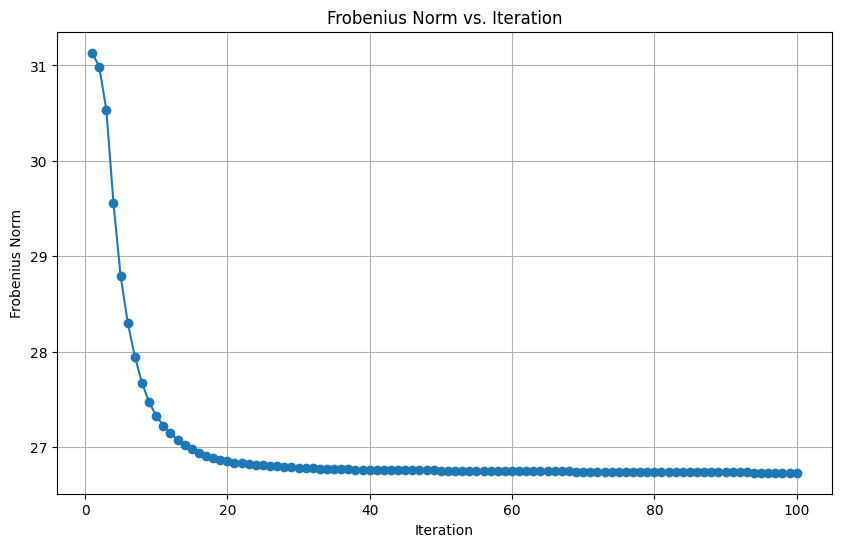

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), frobenius_norms, marker='o')
plt.title('Frobenius Norm vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Frobenius Norm')
plt.grid(True)
plt.show()

In [34]:
topic_components = W.T


In [35]:
def get_top_words_per_topic(components, feature_names, n_top_words=10):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(components):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

feature_names = tfidf_vectorizer.get_feature_names_out()

top_words_per_topic = get_top_words_per_topic(topic_components, feature_names)

for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}: {', '.join(top_words)}")


Topic 1: tonight, mean, sever, check, class, best, log, town, behind, celebr
Topic 2: actual, ate, fake, april, sell, perman, wrote, struggl, sleep, spend
Topic 3: ruin, danc, act, listen, park, ran, found, meet, confus, fill
Topic 4: babi, could, ddlovato, everybodi, count, thing, download, idea, iã, anwb
Topic 5: hahaha, vernonhamilton, appar, websit, ad, mail, mug, everybodi, pee, version
Topic 6: us, one, ta, photo, care, stuck, hubbi, episod, review, mani
Topic 7: unfortun, librari, probabl, boss, later, cri, gone, shout, fit, due
Topic 8: shower, fav, thecoolestout, bay, bout, poohpot, heat, train, mayb, pretti
Topic 9: yeah, better, rude, written, half, second, enough, unexpect, stolen, coupl
Topic 10: trash, gain, save, heard, vaccin, plz, rum, buddi, camp, paulcol
Topic 11: chanc, myspac, year, kid, dad, worst, access, fab, consid, cook
Topic 12: sat, pray, wear, page, music, invit, mail, haha, is, afraid
Topic 13: funni, twitpic, pout, term, awesom, moment, news, understood, 

In [36]:
df['topic'] = W.argmax(axis=1)


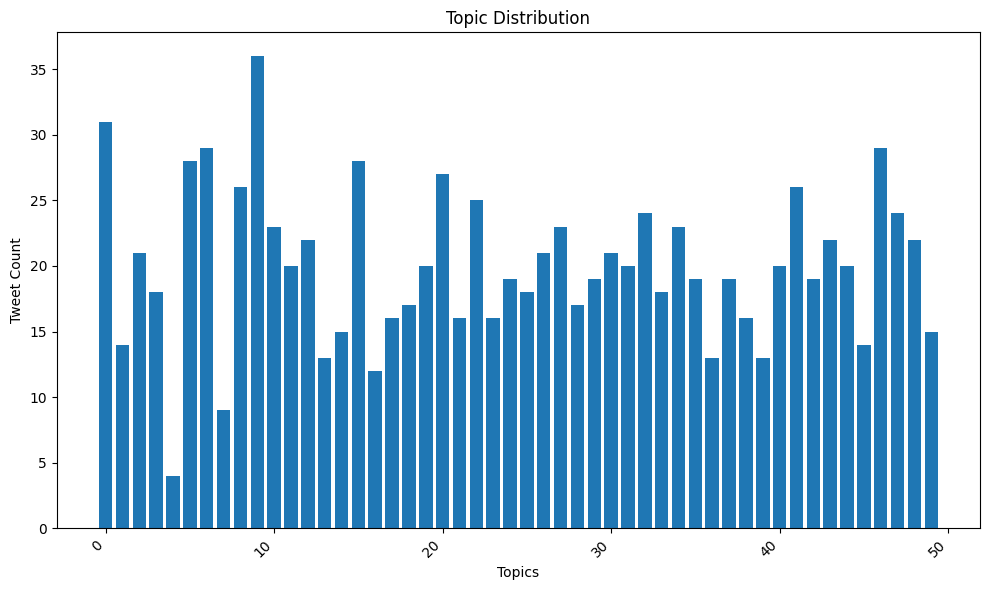

In [37]:
topic_counts = df['topic'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(topic, topic_counts)
plt.xlabel('Topics')
plt.ylabel('Tweet Count')
plt.title('Topic Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
df = pd.read_csv('processed_data.csv', encoding='ISO-8859-1')
df = df.dropna(subset=['processed_text'])
df = df.head(1000)

df.head()

,ids,date,user,text,tokens,processed_text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,"['upset', 'ca', ""n't"", 'updat', 'facebook', 't...",upset ca n't updat facebook text ... might cri...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,"['@', 'kenichan', 'dive', 'mani', 'time', 'bal...",@ kenichan dive mani time ball . manag save 50...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"['whole', 'bodi', 'feel', 'itchi', 'like', 'fi...",whole bodi feel itchi like fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","['@', 'nationwideclass', ',', ""'s"", 'behav', '...","@ nationwideclass , 's behav . 'm mad . ? ca n..."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,"['@', 'kwesidei', 'whole', 'crew']",@ kwesidei whole crew


In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

In [20]:
num_layers = 3
num_nodes_per_layer = [100, 75, 50]

In [21]:
input_data = tfidf_matrix

Ws = []
Hs = []
losses = []


for layer in range(num_layers):
    num_topics = num_nodes_per_layer[layer]

    W = np.random.rand(input_data.shape[0], num_topics)
    H = np.random.rand(num_topics, input_data.shape[1])

    num_iterations = 100
    learning_rate = 0.01

    frobenius_losses = []

    for iteration in range(num_iterations):
        # Update H
        H *= (W.T @ input_data) / (W.T @ W @ H + 1e-9)

        # Update W
        W *= (input_data @ H.T) / (W @ H @ H.T + 1e-9)

        # Calculate Frobenius loss
        frobenius_loss = np.linalg.norm(input_data - W @ H, 'fro')
        frobenius_losses.append(frobenius_loss)


    Ws.append(W)
    Hs.append(H)


    input_data = W @ H

    losses.append(frobenius_losses)

final_W = Ws[-1]
final_H = Hs[-1]




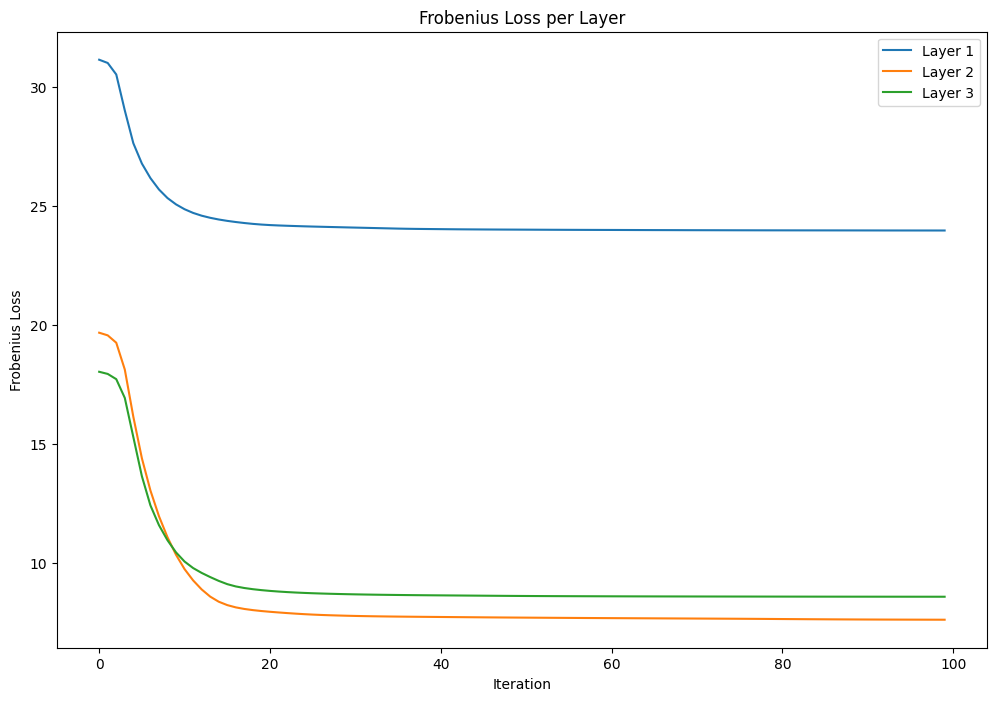

In [22]:
plt.figure(figsize=(12, 8))
for layer, layer_losses in enumerate(losses):
    plt.plot(range(len(layer_losses)), layer_losses, label=f'Layer {layer + 1}')

plt.xlabel('Iteration')
plt.ylabel('Frobenius Loss')
plt.title('Frobenius Loss per Layer')
plt.legend()
plt.show()

In [23]:
topic_components = final_W.T

In [24]:
def get_top_words_per_topic(components, feature_names, n_top_words=10):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(components):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

feature_names = tfidf_vectorizer.get_feature_names_out()

top_words_per_topic = get_top_words_per_topic(topic_components, feature_names)

for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}: {', '.join(top_words)}")

Topic 1: yeah, better, rude, written, half, enough, second, unexpect, stolen, coupl
Topic 2: ruin, danc, act, listen, park, ran, found, fill, confus, meet
Topic 3: view, gon, pant, must, um, admit, sandra, album, missin, statist
Topic 4: clariann, king, consid, cook, sadden, want, aunti, walk, sit, info
Topic 5: wah, hmm, herp, websit, statu, town, exam, round, album, pack
Topic 6: unfortun, librari, probabl, boss, later, cri, shout, fit, gone, due
Topic 7: four, lip, hubbi, attent, feel, counti, 12, rememb, client, background
Topic 8: knew, ladi, appar, hmm, boo, fav, annoy, doesnt, mention, came
Topic 9: hahaha, vernonhamilton, appar, websit, mail, everybodi, mug, pee, ad, counti
Topic 10: chanc, myspac, year, dad, kid, worst, access, log, fab, cri
Topic 11: line, bodi, lovebscott, like, clip, without, worri, rees, anwb, henkuyinepu
Topic 12: sweat, boredd, run, spider, whole, take, continu, via, admit, album
Topic 13: pray, sat, sent, fan, invit, done, is, fuck, unfollow, wear
Topic

In [25]:
df['topic'] = final_W.argmax(axis=1)


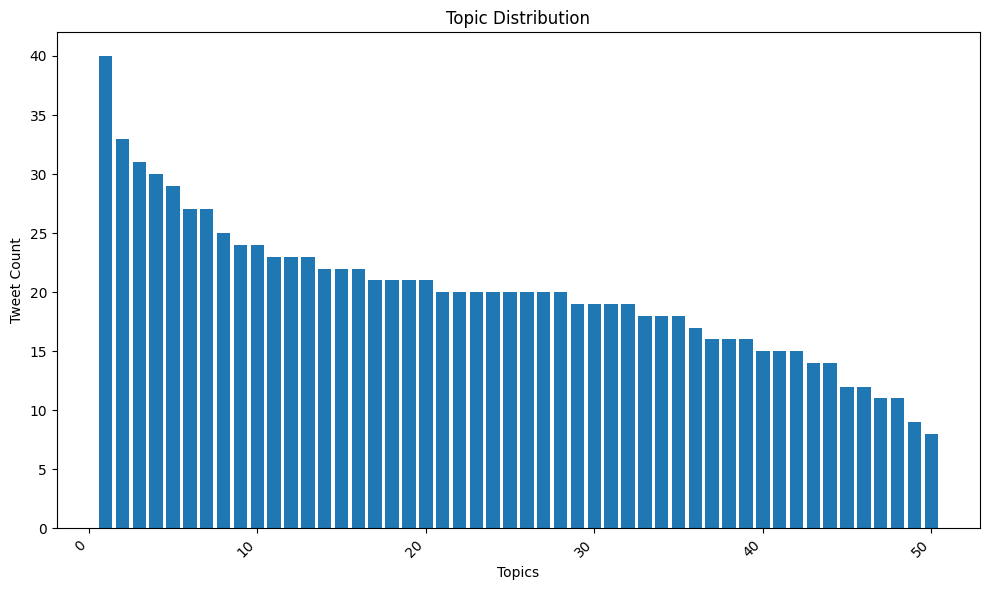

In [26]:
topic_counts = df['topic'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(range(1,num_topics+1), topic_counts)
plt.xlabel('Topics')
plt.ylabel('Tweet Count')
plt.title('Topic Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()